In [1]:
#!pip install xlrd

In [2]:
import pandas as pd
df = pd.read_excel('지역_위치별(주유소).xls')

In [3]:
df_new = df.copy()
df_new = df_new.dropna(how='any')
df_new

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
1,서울특별시,SK서광주유소,서울 강남구 역삼로 142 (역삼동),SK에너지,25624855,Y,1765.0,1565,1365,990.0
4,서울특별시,현대오일뱅크(주)유진주유소,서울 강남구 논현로 152 (도곡동),현대오일뱅크,234625215,N,1805.0,1586,1384,1060.0
11,서울특별시,세진에너지 개포주유소,서울 강남구 양재대로 339 (개포동),GS칼텍스,25739031,N,1880.0,1598,1398,1152.0
13,서울특별시,주식회사 논현에너지,서울 강남구 학동로 229 (논현동),GS칼텍스,234439545,N,1898.0,1609,1412,1150.0
16,서울특별시,역삼주유소,서울특별시 강남구 논현로 426 (역삼동),GS칼텍스,25485145,N,1833.0,1633,1399,850.0
18,서울특별시,SK서광그린주유소,서울특별시 강남구 봉은사로 222(역삼동),SK에너지,25664855,N,1885.0,1685,1485,1050.0
20,서울특별시,동일석유(주)대치동셀프주유소,서울 강남구 영동대로 202 (대치동),SK에너지,25663037,Y,1998.0,1688,1438,1119.0
25,서울특별시,일진실업(주)스포월드주유소,서울 강남구 언주로 559 (역삼동),GS칼텍스,25087021,N,2061.0,1823,1653,1024.0
26,서울특별시,대청주유소,서울 강남구 개포로 654 (일원동),SK에너지,24455500,N,2079.0,1859,1639,1399.0
28,서울특별시,논현주유소,서울 강남구 논현로 747 (논현동),SK에너지,25110955,N,1998.0,1865,1651,1198.0


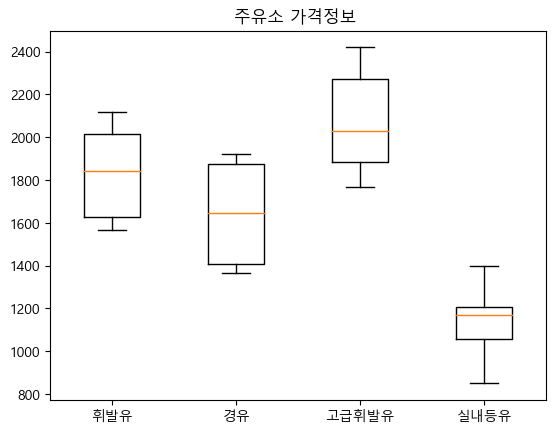

In [6]:
# Basic box plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.boxplot([
    df_new['휘발유'],
    df_new['경유'],
    df_new['고급휘발유'],
    df_new['실내등유']
    ], sym="bo")
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.title('주유소 가격정보 ')
plt.xticks([1,2,3,4],['휘발유','경유','고급휘발유','실내등유'])
plt.show()

boxplot을 그려보았을 때, outlier는 없는 것으로 확인되지만, 공식을 이용하여 확인해볼수도 있다.

In [5]:
import numpy as np
lst = ['휘발유', '경유', '고급휘발유', '실내등유']
for s in lst:
    Q1 = np.percentile(df_new[s], 25)
    Q3 = np.percentile(df_new[s], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5*IQR
    print('%s 가격의 outlier_step : %f '%(s,outlier_step))
    result = df_new[(df_new[s] < Q1 - outlier_step) | 
                    (df_new[s] > Q3 + outlier_step)]    
    
    if result.empty:
        print('%s 가격의 이상치가 없습니다\n' %s)
    else:
        print('----%s 가격의 이상치----'%s)
        print(result)
        print()


휘발유 가격의 outlier_step : 580.500000 
휘발유 가격의 이상치가 없습니다

경유 가격의 outlier_step : 696.375000 
경유 가격의 이상치가 없습니다

고급휘발유 가격의 outlier_step : 582.750000 
고급휘발유 가격의 이상치가 없습니다

실내등유 가격의 outlier_step : 223.125000 
실내등유 가격의 이상치가 없습니다

